# Scientific Programming with Python

## Final Assignment


**Student's name: Gregor-Hendrik Laarmann**


**Student-ID: 9036940**

Department of Computer Science, University of Applied Sciences Bonn-Rhein-Sieg,
Sankt Augustin, Germany

January 31st, 2022

### Task 1
- **Load the "rabbit_vs_turtle.csv" file as a Pandas Dataframe.**

- **Remove rows that have missing data entries.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy
import sys
from scipy.interpolate import interp1d

In [2]:
path = 'rabbit_vs_turtle.csv'

## read in data for rabbits and turtles velocity.
try:
    df_rabbit_vs_turtle = pd.read_csv(path)
    df_rabbit_vs_turtle_original = pd.read_csv(path)  ## need unmodified dataframe in task 3
except IOError as error:
    sys.exit(f'IOError when reading csv file: {error}')

## remove rows with NaN's and reset index
df_rabbit_vs_turtle = df_rabbit_vs_turtle.dropna()
df_rabbit_vs_turtle = df_rabbit_vs_turtle.reset_index(drop=True)

df_rabbit_vs_turtle

,time (minutes),rabbit velocity (meters/hour),turtle velocity (meters/hour)
0,0,0.00,0.00
1,1,0.85,0.79
2,2,1.43,1.05
3,3,1.59,1.42
4,4,2.20,1.87
5,5,2.07,2.02
6,6,2.56,2.09
7,7,2.30,2.38
8,8,2.51,2.59
9,9,2.50,2.74


### Task 2
**a) Use Numpy to separately fit a 5th-degree polynomial to the rabbit and turtle data.**

In [3]:
'''
This cell is for converting the columns of the dataframe to numpy arrays.
This way I can use built in numpy functions to calculate the coefficients
of the polynomial and the polynomial itself.
'''

time_x_axis = np.array(df_rabbit_vs_turtle['time (minutes)'].values)

turtle_velocity_y_axis = np.array(df_rabbit_vs_turtle['turtle velocity (meters/hour)'].values)

rabbit_velocity_y_axis = np.array(df_rabbit_vs_turtle['rabbit velocity (meters/hour)'].values)

In [4]:
def fit_n_degree_polynomial(x_values: list = None, y_values: list = None,
                            degree: int = None) -> None:
    '''
    This function calculates a fitted polynomial function
    when entered x-values, y-values and the degree.

    Input:
        x_values(list): x axis values as a list
        y_values(list): y axis values as a list
        degree(int): degree of the polynomial

    Return:
        Polynomial Function
    '''

    if x_values is None or y_values is None or degree is None:
        raise TypeError('Pleas assign a value to the input parameters!')
    elif not isinstance(x_values, (np.ndarray, list)):
        raise TypeError('The x_values are not a list. Please check your input!')
    elif not isinstance(y_values, (np.ndarray, list)):
        raise TypeError('The y_values are not a list. Please check your input!')
    elif not isinstance(degree, int):
        raise TypeError('The degree is not an integer. Please check your input!')
    elif not np.any(y_values) or not np.any(x_values):
        raise TypeError('Your lists are empty. Please check your input!')
    elif len(x_values) != len(y_values):
        raise TypeError('Your lists do not have the same length. Please check your input!')

    ## calculate polynomial
    coefficients = np.polyfit(x_values, y_values, degree)
    poly_equation = np.poly1d(coefficients)

    return poly_equation

**b) Display the resulting polynomial equations**

In [5]:
print(f"{fit_n_degree_polynomial(x_values=time_x_axis, y_values=turtle_velocity_y_axis, degree=5)}"
      f": 5th-degree polynomial for the turtle's data")

print(f"{fit_n_degree_polynomial(x_values=time_x_axis, y_values=rabbit_velocity_y_axis, degree=5)}"
      f": 5th-degree polynomial for the rabbit's data")

           5             4             3           2
4.033e-08 x - 6.897e-06 x + 0.0004659 x - 0.01615 x + 0.3811 x + 0.3204: 5th-degree polynomial for the turtle's data
           5             4            3           2
3.079e-07 x - 4.989e-05 x + 0.002796 x - 0.06352 x + 0.6472 x + 0.2044: 5th-degree polynomial for the rabbit's data


### Task 3
**Using Matplotlib, create a single graph that overlays the original rabbit and turtle input data and the resulting fitted
polynomials (i.e. 2 datasets and two functions should be shown in total).**


In [6]:
'''
This cell is for converting the columns of the original dataframe to numpy arrays.
'''

time_x_axis_original = np.array(df_rabbit_vs_turtle_original['time (minutes)'].values)

turtle_velocity_y_axis_original = np.array(df_rabbit_vs_turtle_original['turtle velocity (meters/hour)'].values)

rabbit_velocity_y_axis_original = np.array(df_rabbit_vs_turtle_original['rabbit velocity (meters/hour)'].values)

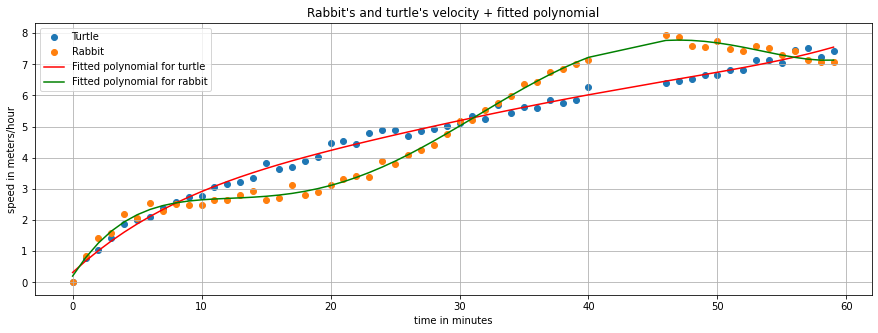

In [7]:
## these equations are needed to be able to plot the polynomials correctly
equation_turtle = fit_n_degree_polynomial(time_x_axis, turtle_velocity_y_axis, 5)
equation_rabbit = fit_n_degree_polynomial(time_x_axis, rabbit_velocity_y_axis, 5)

## adding some details to the plot
plt.figure(figsize=(15, 5))
plt.title("Rabbit's and turtle's velocity + fitted polynomial")
plt.xlabel('time in minutes')
plt.ylabel('speed in meters/hour')
plt.grid()

## original data
plt.scatter(time_x_axis_original, turtle_velocity_y_axis_original, label='Turtle')
plt.scatter(time_x_axis_original, rabbit_velocity_y_axis_original, label='Rabbit')

## polynomial equations
plt.plot(time_x_axis, equation_turtle(time_x_axis), color='red', label='Fitted polynomial for turtle')
plt.plot(time_x_axis, equation_rabbit(time_x_axis), color='green', label='Fitted polynomial for rabbit')

## final adjustments to the plot
plt.legend()
plt.show()

### Task 4
The following equation is used to compute the mean of a function:
$$ \bar{f}=\frac{1}{b-a}\int_a^bf(t)\,dt$$

where,

$\bar{f}$ = average value of a function $f(t)$ over the interval $[a,b]$

$a$ = lower bound of the integral

$b$ = higher bound of the integral

$f(t)$ = function


**a) Using Sympy, compute the mean velocity for both the rabbit and turtle using the equatoin mentioned above from 0-60 minutes.**

I decided to write a user-defined function that will compute the mean of a function when given the coefficients of the polynomial function and the lower and higher bound values of the integral. Solution is in the next cell.

In [8]:
def mean_of_function(coefficients: list = None, lower_integral_bound: float = None,
                     upper_integral_bound: float = None) -> float:
    '''
    This function will compute the mean of a polynomial function
    when entering the coefficients and the interval boundaries.

    Input
        coefficients (list): coefficients of the polynomial
        lower_integral_bound (int): this is the value for the lower integral bound
        upper_integral_bound (int): this is the value for the upper integral bound

    Return
        mean of a polynomial function in sympy
    '''

    if coefficients is None or lower_integral_bound is None or upper_integral_bound is None:
        raise TypeError('Pleas assign a value to the input parameters!')
    elif not np.any(coefficients):
        raise TypeError('Your array is empty, please check your values in the array!')

    ## decalre variable as symbol.
    x = sympy.symbols('x')

    ## Construct a polynomial by providing a numpy array of all the coefficients. 'x' is the variable.
    polynomial = sympy.Poly.from_list(coefficients, x)

    ## Convert polynomial to a polynomial expression to be able to calculate with the polynomial.
    polynomial_expression = polynomial.as_expr()

    ## calculate integrals of the polynomial expression
    integrale_of_expression = sympy.integrate(polynomial_expression, (x, lower_integral_bound, upper_integral_bound))

    ## finally we return the mean of the polynomial function with the equation for mean of a function
    return (1/upper_integral_bound - lower_integral_bound) * integrale_of_expression

print(mean_of_function(equation_turtle, 0, 60))
print(mean_of_function(equation_rabbit, 0, 60))

4.88688063659246
4.97667976100776


**b) Briefly comment on how the values compare to the arithmetic mean.**

- The values are pretty similar, the arithmetic mean for the original(including the missing values from minute 41-45) turtle data is 4.696 meters/hour and for the rabbit data it is 4.676 meters/hour. The arithmetic mean value represents the average speed in meters/hour over the whole course of the race. This is calculated by summing up all the values(i.e. velocity at every minute during the race) and then dividing by the amount of the single values that we have. In our case this would be 60, because we have data for 60 minutes(one value for every minute).
- Whereas the mean of the function for the turtle data is 4.887 meters/hour and for the rabbits data it is 4.977 meters/hour.

In [9]:
print(np.mean(df_rabbit_vs_turtle_original['turtle velocity (meters/hour)']))
print(np.mean(df_rabbit_vs_turtle_original['rabbit velocity (meters/hour)']))

4.696181818181818
4.67618181818182


### Task 5
**a) Interpolate the missing data for the rabbit and turtle from minute 41-45 with SciPy.**

In [10]:
def interpolation(original_x_values: list = None, missing_x_values: list = None,
                  missing_y_values: list = None) -> list:
    '''
    This function will interpolate missing values when given three lists, one list with the original x axis data,
    one list with the missing x axis data and one list with missing y axis data.

    Input:
        original_x_values(list): list with original values for the x axis
        missing_x_values(list): list with missing values for the x axis
        missing_y_values(list): list with missing values for the y axis


    Return:
        list with new interpolated data values for the y axis
    '''

    if original_x_values is None or missing_x_values is None or missing_y_values is None:
        raise TypeError('Pleas assign a value to the input parameters!')
    elif not len(missing_x_values) == len(missing_y_values):
        raise TypeError('The length of the arrays with missing values has to be identical. Please check your arrays!')
    elif not isinstance(original_x_values, (np.ndarray, list)):
        raise TypeError('The original_x_values are not a list. Please check your input!')
    elif not isinstance(missing_x_values, (np.ndarray, list)):
        raise TypeError('The missing_x_values are not a list. Please check your input!')
    elif not isinstance(missing_y_values, (np.ndarray, list)):
        raise TypeError('The missing_y_values are not a list. Please check your input!')

    ## compute a function for interpolation
    interpolation_function = interp1d(missing_x_values, missing_y_values, kind='linear')

    ## compute and interpolate the missing values for the y axis in a new list
    new_interpolated_y_values = interpolation_function(original_x_values)

    return new_interpolated_y_values

print(interpolation(time_x_axis_original, time_x_axis, rabbit_velocity_y_axis))
print(interpolation(time_x_axis_original, time_x_axis, turtle_velocity_y_axis))

[0.   0.85 1.43 1.59 2.2  2.07 2.56 2.3  2.51 2.5  2.49 2.64 2.66 2.81
 2.95 2.64 2.7  3.13 2.82 2.91 3.14 3.32 3.43 3.39 3.89 3.79 4.09 4.24
 4.42 4.76 5.19 5.22 5.53 5.76 5.98 6.38 6.43 6.74 6.84 7.02 7.15 7.28
 7.41 7.54 7.67 7.8  7.93 7.87 7.59 7.55 7.75 7.48 7.44 7.59 7.52 7.3
 7.43 7.15 7.06 7.06]
[0.         0.79       1.05       1.42       1.87       2.02
 2.09       2.38       2.59       2.74       2.77       3.07
 3.16       3.21       3.34       3.83       3.63       3.72
 3.9        4.01       4.46       4.54       4.43       4.79
 4.89       4.9        4.71       4.85       4.93       5.03
 5.11       5.33       5.26       5.69       5.43       5.63
 5.6        5.87       5.77       5.86       6.26       6.28166667
 6.30333333 6.325      6.34666667 6.36833333 6.39       6.46
 6.53       6.66       6.67       6.82       6.83       7.15
 7.13       7.05       7.45       7.54       7.25       7.43      ]


**b) Create a single graph that overlays the original data and the interpolated data.**

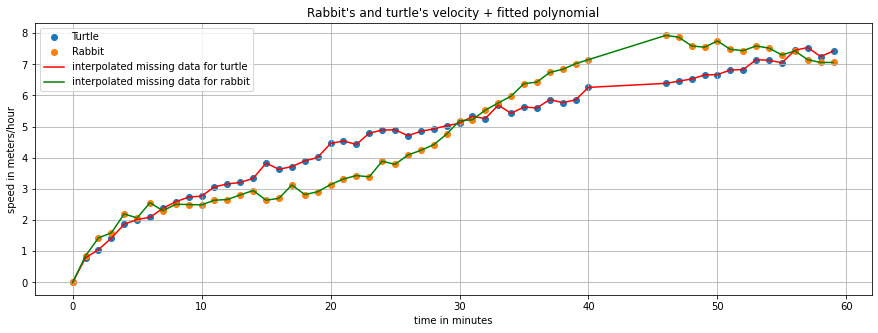

In [11]:
plt.figure(figsize=(15, 5))
plt.title("Rabbit's and turtle's velocity + fitted polynomial")
plt.xlabel('time in minutes')
plt.ylabel('speed in meters/hour')
plt.grid()

## original data
plt.scatter(time_x_axis_original, turtle_velocity_y_axis_original, label='Turtle')
plt.scatter(time_x_axis_original, rabbit_velocity_y_axis_original, label='Rabbit')

## interpolated data
plt.plot(time_x_axis_original, interpolation(time_x_axis_original, time_x_axis, turtle_velocity_y_axis),
        color='red', label='interpolated missing data for turtle')
plt.plot(time_x_axis_original, interpolation(time_x_axis_original, time_x_axis, rabbit_velocity_y_axis),
         color='green', label='interpolated missing data for rabbit')

## final adjustments
plt.legend()
plt.show()

**c) Create and Display a Pandas Dataframe that reports only the interpolated data of the missing minutes.**

In [12]:
## save interpolated data in numpy array
interpolated_data_rabbit = interpolation(time_x_axis_original, time_x_axis, rabbit_velocity_y_axis)
interpolated_data_turtle = interpolation(time_x_axis_original, time_x_axis, turtle_velocity_y_axis)

## overwrite both dataframe columns with interpolated data
df_rabbit_vs_turtle_original['rabbit velocity (meters/hour)'] = interpolated_data_rabbit
df_rabbit_vs_turtle_original['turtle velocity (meters/hour)'] = interpolated_data_turtle

## create new dataframe that only has the interpolated data rows
df_only_interpolated_data = df_rabbit_vs_turtle_original.iloc[41:46].round(2)
df_only_interpolated_data = df_only_interpolated_data.reset_index(drop=True)

df_only_interpolated_data

,time (minutes),rabbit velocity (meters/hour),turtle velocity (meters/hour)
0,41,7.28,6.28
1,42,7.41,6.30
2,43,7.54,6.32
3,44,7.67,6.35
4,45,7.80,6.37
